# Simple Imputer
1. In this we can fill values by following technique.
    1. **mean**
    2. **median**
    3. **Arbitarty values**
2. we can fill the values by mean if data is normally distrubuted.
3. we can fill the valeues by median if data is skewed.

# Import packages

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Datset

In [31]:
df=pd.read_csv('train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Now get only numeric data

In [32]:
df=df.select_dtypes('number')

In [33]:
df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833


# Check the missing values

In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

# Now fill the values by mean and median

# Using Pandas

In [41]:
temp=df.copy()

In [43]:
temp['Age_mean']=temp['Age'].fillna(df['Age'].mean())
temp['Age_median']=temp['Age'].fillna(df['Age'].median())

In [46]:
temp[temp['Age'].isnull()]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_mean,Age_median
5,6,0,3,NaN,0,0,8.4583,29.699118,28.0
17,18,1,2,NaN,0,0,13.0000,29.699118,28.0
19,20,1,3,NaN,0,0,7.2250,29.699118,28.0
26,27,0,3,NaN,0,0,7.2250,29.699118,28.0
28,29,1,3,NaN,0,0,7.8792,29.699118,28.0
...,...,...,...,...,...,...,...,...,...
859,860,0,3,NaN,0,0,7.2292,29.699118,28.0
863,864,0,3,NaN,8,2,69.5500,29.699118,28.0
868,869,0,3,NaN,0,0,9.5000,29.699118,28.0
878,879,0,3,NaN,0,0,7.8958,29.699118,28.0


# check the distrubution before and after fill values

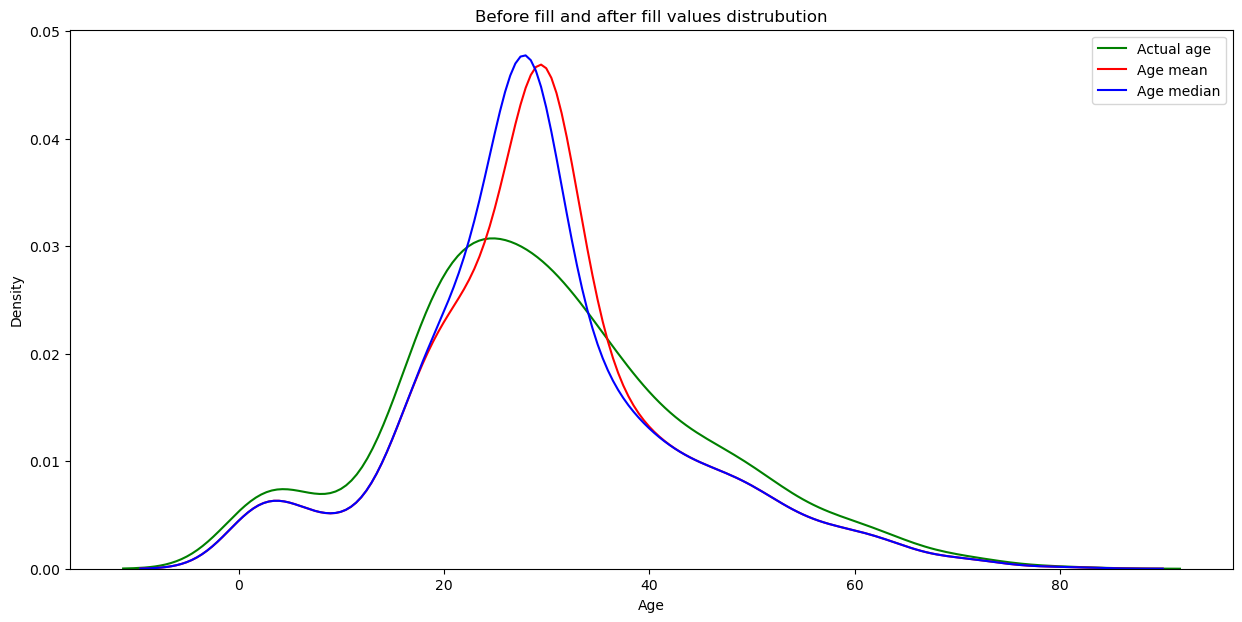

In [47]:
fig,(ax1)=plt.subplots(figsize=(15,7))
ax1.set_title("Before fill and after fill values distrubution")
sns.kdeplot(temp['Age'],color='green',label='Actual age')
sns.kdeplot(temp['Age_mean'],color='red',label='Age mean')
sns.kdeplot(temp['Age_median'],color='blue',label='Age median')
plt.legend()
plt.show()

# Conclussion
1. we can see that distrubution should be change if we can fill with `mean` and `median` so it is not good.
2. After fill with mean and median it is necessary the distrubution should not change.

# Saperate `feature` and `label`

In [50]:
feature=df.drop(columns='Survived')
label=df['Survived']

# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=42)

In [61]:
x_train.shape

(712, 6)

In [62]:
x_test.shape

(179, 6)

# Now fill using `Simple imputer`

In [63]:
from sklearn.impute import SimpleImputer

In [64]:
impute=SimpleImputer(strategy='mean')
x_train['Age_Mean']=impute.fit_transform(x_train[['Age']])
x_test['Age_Mean']=impute.transform(x_test[['Age']])

In [65]:
x_train.isnull().sum()

PassengerId      0
Pclass           0
Age            140
SibSp            0
Parch            0
Fare             0
Age_Mean         0
dtype: int64

# Fill with `median`

In [67]:
impute=SimpleImputer(strategy='median')
x_train['Age_Median']=impute.fit_transform(x_train[['Age']])
x_test['Age_Median']=impute.transform(x_test[['Age']])

In [68]:
x_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_Mean,Age_Median
331,332,1,45.5,0,0,28.5000,45.5,45.5
733,734,2,23.0,0,0,13.0000,23.0,23.0
382,383,3,32.0,0,0,7.9250,32.0,32.0
704,705,3,26.0,1,0,7.8542,26.0,26.0
813,814,3,6.0,4,2,31.2750,6.0,6.0


# It has the same disadvantage it can change the `distrubution` of data

# Now fill with `Arbitary` value

In [69]:
impute=SimpleImputer(strategy="constant",fill_value=-1)
x_train['Age_Arbitary']=impute.fit_transform(x_train[['Age']])
x_test['Age_Arbitarty']=impute.transform(x_test[['Age']])

In [71]:
x_train.head(4)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_Mean,Age_Median,Age_Arbitary
331,332,1,45.5,0,0,28.5000,45.5,45.5,45.5
733,734,2,23.0,0,0,13.0000,23.0,23.0,23.0
382,383,3,32.0,0,0,7.9250,32.0,32.0,32.0
704,705,3,26.0,1,0,7.8542,26.0,26.0,26.0


In [72]:
impute=SimpleImputer(strategy="constant",fill_value=-99)
x_train['Age_Arbitary_99']=impute.fit_transform(x_train[['Age']])
x_test['Age_Arbitarty_99']=impute.transform(x_test[['Age']])

In [73]:
x_train.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Age_Mean,Age_Median,Age_Arbitary,Age_Arbitary_99
331,332,1,45.5,0,0,28.500,45.5,45.5,45.5,45.5
733,734,2,23.0,0,0,13.000,23.0,23.0,23.0,23.0
382,383,3,32.0,0,0,7.925,32.0,32.0,32.0,32.0


# Now check the distrubution of each `impution`

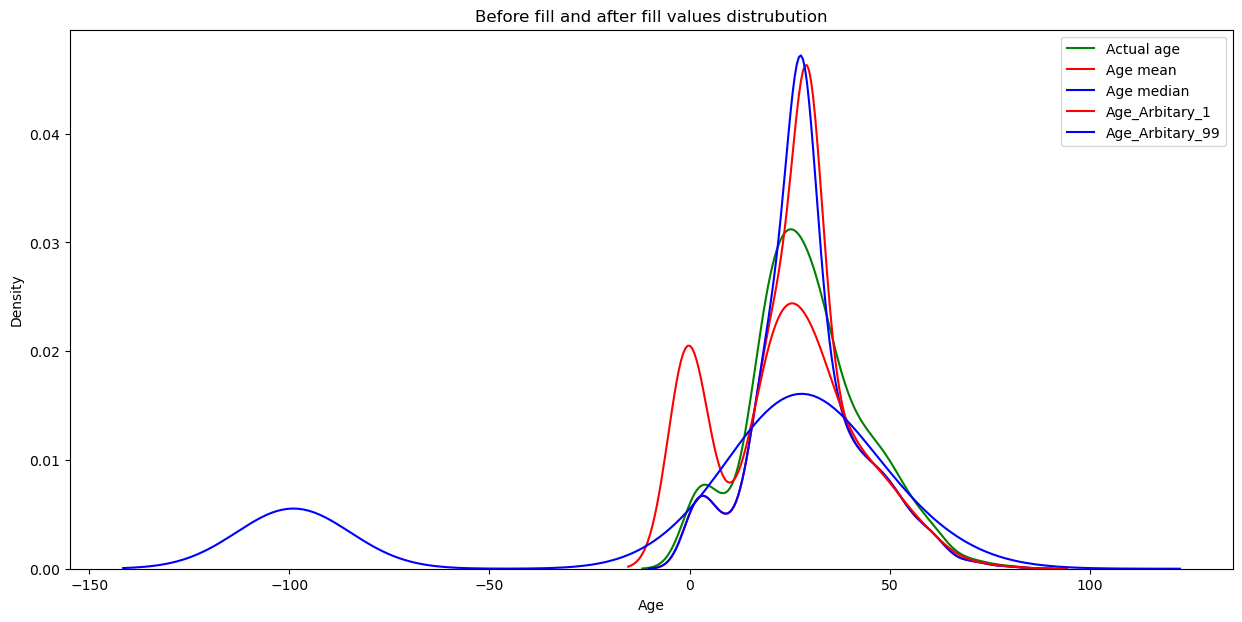

In [74]:
fig,(ax1)=plt.subplots(figsize=(15,7))
ax1.set_title("Before fill and after fill values distrubution")
sns.kdeplot(x_train['Age'],color='green',label='Actual age')
sns.kdeplot(x_train['Age_Mean'],color='red',label='Age mean')
sns.kdeplot(x_train['Age_Median'],color='blue',label='Age median')
sns.kdeplot(x_train['Age_Arbitary'],color='red',label='Age_Arbitary_1')
sns.kdeplot(x_train['Age_Arbitary_99'],color='blue',label='Age_Arbitary_99')
plt.legend()
plt.show()

# Conclussion
1. We can see that `distrubution` should be chaneg of each imputition.
2. If the `distrubution` should change correlation also change